In [6]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import japanize_matplotlib
from glob import glob
from pathlib import Path

from consts import DATASET_ROOT, DATASET_PARENT_ROOT, CHECKPOINTS_ROOT
from utils import Range, ColorRange, filter_blue, focus_yellow, to_pil, run_focusing_yellow, COLOR_RANGE, draw_from_binary_mask, draw_bbox, get_weak_reflection_parts

Ps9KiiFisn


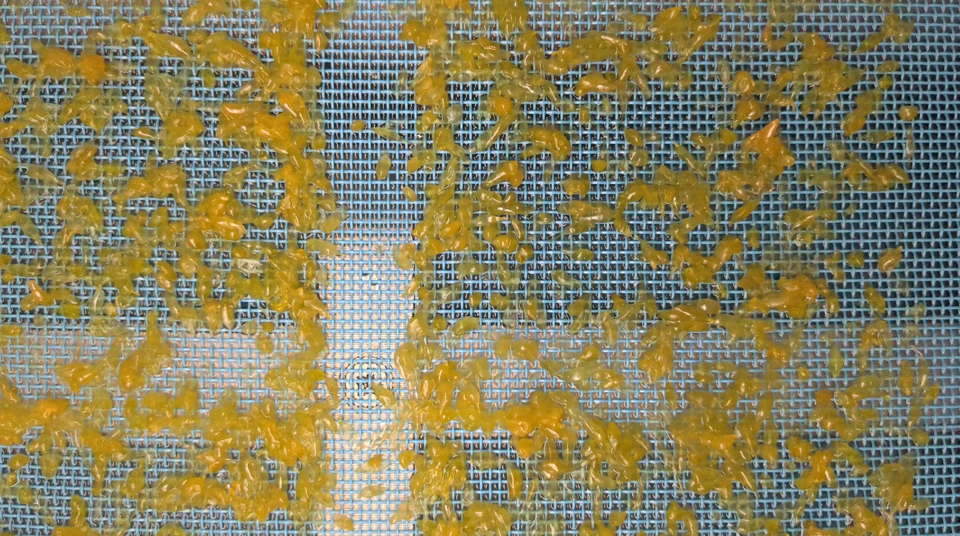

In [7]:
stems = [Path(p).stem for p in glob(f"{DATASET_ROOT}/comp/*.png")]
MASK_ROOT = f"{DATASET_PARENT_ROOT}/label_studio_VID_20240124_163346/mask"
obj_masks = {s: cv2.imread(os.path.join(MASK_ROOT, f"{s}.png")) for s in stems}

STEM = stems[0]
print(STEM)

ROOT = f"{CHECKPOINTS_ROOT}/dsrnet_s_test/20240603-165422/test/{STEM}"
# origin_image = f"comp/{STEM}.png"
origin_image_p = f"{ROOT}/m_input.png"
dsrnet_s_test_l_p = f"{ROOT}/dsrnet_s_test_l.png"
dsrnet_s_test_r_p = f"{ROOT}/dsrnet_s_test_r.png"
dsrnet_s_test_rr_p = f"{ROOT}/dsrnet_s_test_rr.png"

assert np.all([os.path.exists(p) for p in [origin_image_p, dsrnet_s_test_l_p, dsrnet_s_test_r_p, dsrnet_s_test_rr_p]])

Image.open(origin_image_p)

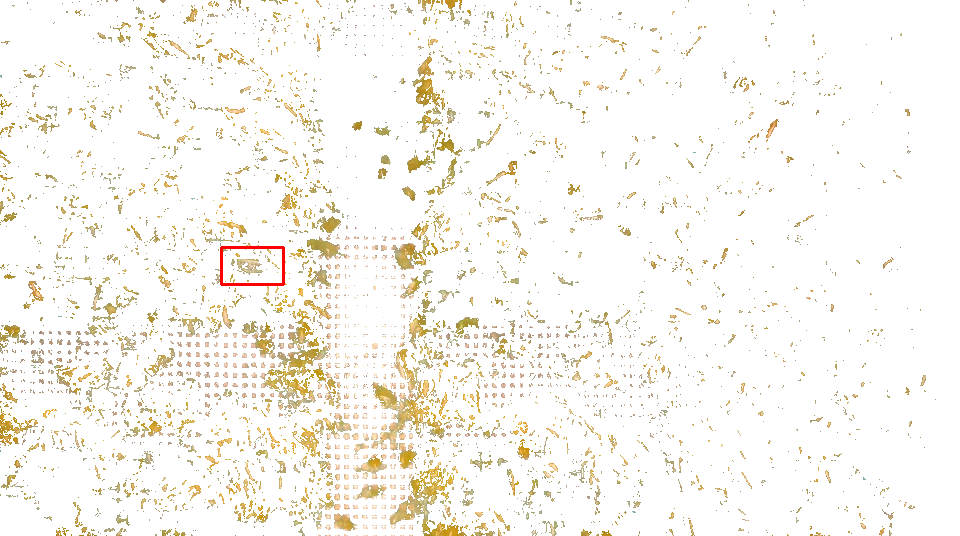

In [8]:
origin_image, dsrnet_s_test_l, mask, masked = get_weak_reflection_parts(
    origin_image_p, dsrnet_s_test_l_p, dsrnet_s_test_r_p, dsrnet_s_test_rr_p, obj_masks[STEM], does_draw_bbox=True
)
Image.fromarray(masked[:, :, ::-1])

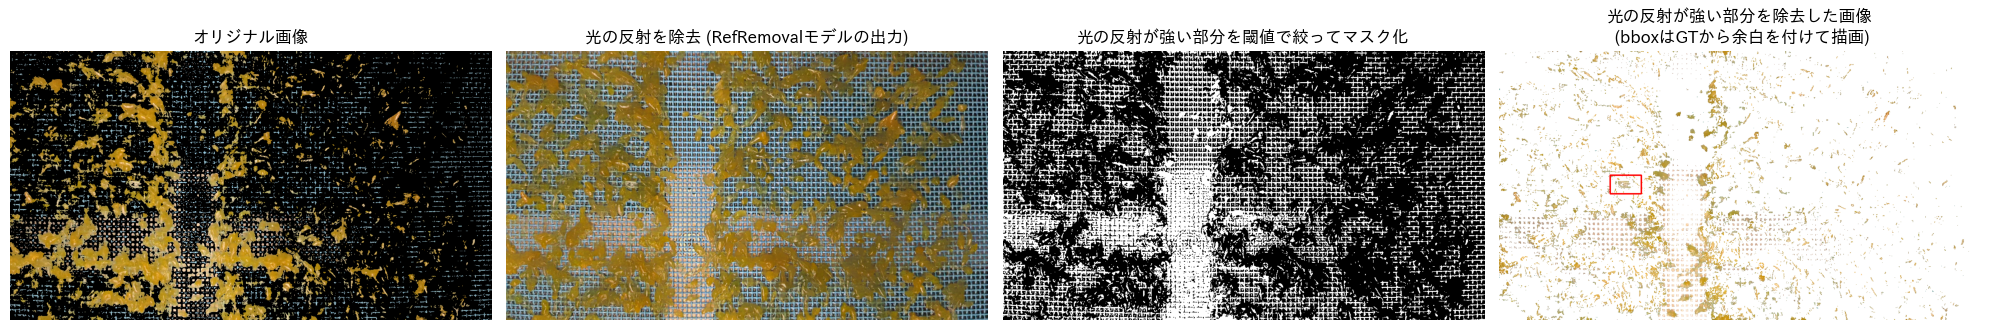

In [9]:
def display_images(original, reflection, mask, non_reflective):
    fig, axes = plt.subplots(1, 4, figsize=(20, 10))

    axes[0].imshow(original)
    axes[0].set_title("オリジナル画像")
    axes[0].axis("off")

    axes[1].imshow(reflection, cmap="gray")
    axes[1].set_title("光の反射を除去 (RefRemovalモデルの出力)")
    axes[1].axis("off")

    axes[2].imshow(mask, cmap="gray")
    axes[2].set_title("光の反射が強い部分を閾値で絞ってマスク化")
    axes[2].axis("off")

    axes[3].imshow(non_reflective)
    axes[3].set_title("光の反射が強い部分を除去した画像\n (bboxはGTから余白を付けて描画)")
    axes[3].axis("off")

    # plt.savefig(f"{STEM}.png", bbox_inches="tight")
    plt.tight_layout()
    plt.show()


display_images(
    origin_image[:, :, ::-1],
    dsrnet_s_test_l[:, :, ::-1],
    mask,
    masked[:, :, ::-1],
)